# Parcial: Construcción e implementación de , Random Forest 

En este parcial podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de  Random Forest. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este parcial se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



In [9]:
%matplotlib inline
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,False,False,False,True,False,False,False
11,13995,2014,39972,False,False,False,False,True,False,False
167,17941,2016,18989,False,False,False,False,False,True,False
225,12493,2014,51330,False,False,False,True,False,False,False
270,7994,2007,116065,False,True,False,False,False,False,False


In [10]:
# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [11]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 0 - exploracion y analisis de datos 
Los estudiantes deben analizar cuidadosamente los datos del conjunto dataTrain_carListings, identificando posibles valores nulos o inconsistencias. En caso de encontrar datos faltantes, deberán aplicar técnicas de imputación adecuadas para completar la información de manera coherente. Posteriormente, se espera que realicen una exploración visual mediante gráficos que permitan comprender la distribución y las relaciones entre las variables principales.

Valores nulos por columna:
Price      0
Year       0
Mileage    0
Model      0
dtype: int64

Resumen estadístico:
              Price          Year        Mileage
count  10495.000000  10495.000000   10495.000000
mean   14538.403716   2013.553883   52509.430395
std     3922.420961      3.116585   36791.736601
min     5002.000000   1998.000000       5.000000
25%    11999.000000   2012.000000   26461.000000
50%    15000.000000   2014.000000   41680.000000
75%    16999.000000   2016.000000   71355.500000
max    32444.000000   2018.000000  232658.000000


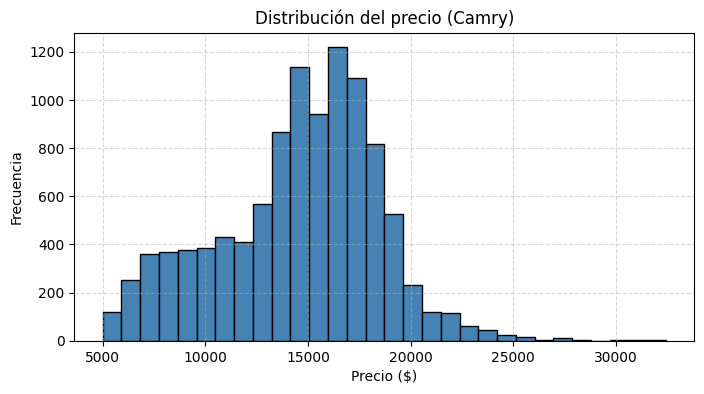

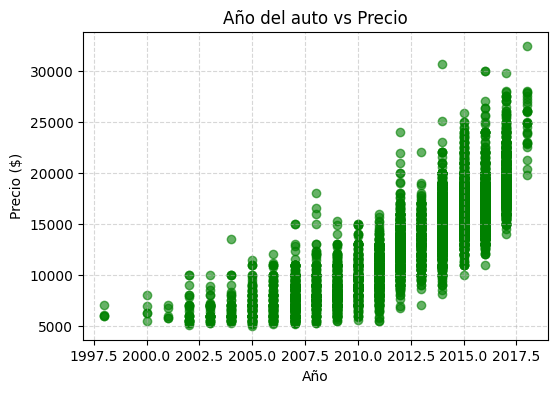

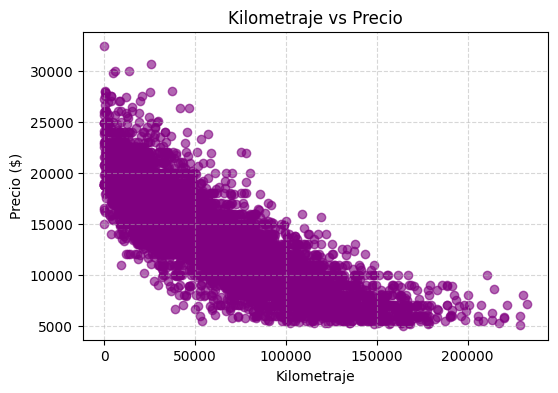

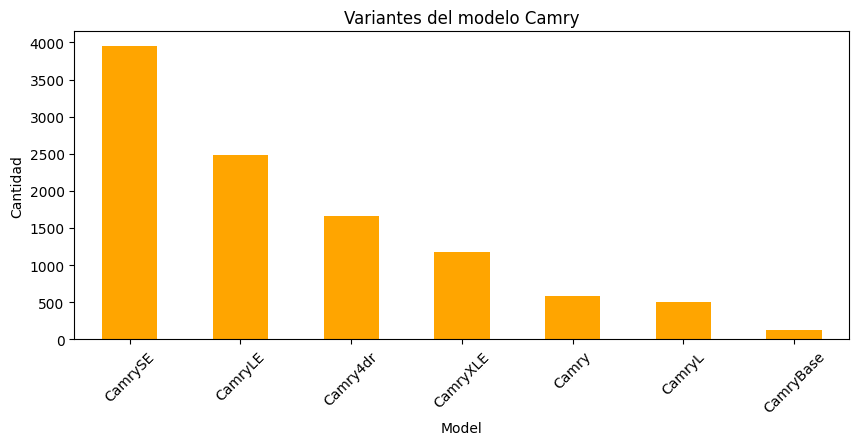

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip'
data = pd.read_csv(url)
data = data[data['Model'].str.contains('Camry')].copy()
data = data.drop(['Make', 'State'], axis=1)

print("Valores nulos por columna:")
print(data.isnull().sum())

data['Mileage'].fillna(data['Mileage'].median(), inplace=True)
data['Price'].fillna(data['Price'].median(), inplace=True)

print("\nResumen estadístico:")
print(data.describe())

# Gráfico 1: Distribución del precio
plt.figure(figsize=(8, 4))
plt.hist(data['Price'], bins=30, color='steelblue', edgecolor='black')
plt.title('Distribución del precio (Camry)')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Gráfico 2: Año vs Precio
plt.figure(figsize=(6, 4))
plt.scatter(data['Year'], data['Price'], alpha=0.6, color='green')
plt.title('Año del auto vs Precio')
plt.xlabel('Año')
plt.ylabel('Precio ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Gráfico 3: Kilometraje vs Precio
plt.figure(figsize=(6, 4))
plt.scatter(data['Mileage'], data['Price'], alpha=0.6, color='purple')
plt.title('Kilometraje vs Precio')
plt.xlabel('Kilometraje')
plt.ylabel('Precio ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Si hay más de una variante de Camry, mostrar su frecuencia
if data['Model'].nunique() > 1:
    plt.figure(figsize=(10, 4))
    data['Model'].value_counts().plot(kind='bar', color='orange')
    plt.title('Variantes del modelo Camry')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.show()

### Punto 1 - Random forest con librería

En la celda 1, usando la librería sklearn entrenen un modelo de Randon Forest para regresion  y comenten sobre el desempeño del modelo.

Error cuadrático medio (MSE): 3142007.83
Error absoluto medio (MAE): 1321.64
Coeficiente de determinación (R²): 0.795


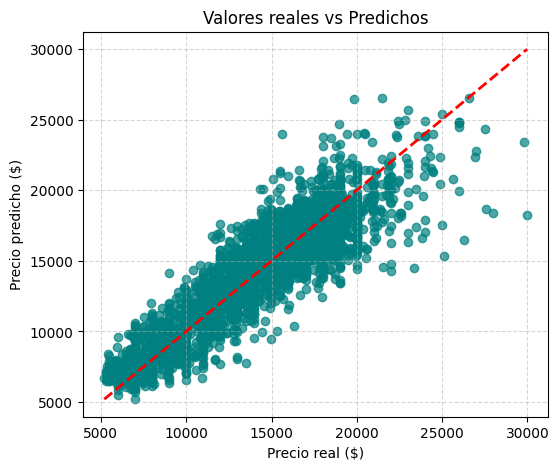

In [ ]:

data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data = data.dropna(subset=['Price']) 


y = data['Price']
X = data.drop(['Price'], axis=1)

X = pd.get_dummies(X, columns=['Model'], prefix='M', drop_first=True)

# Entrenar el modelo de Random Forest para regresión

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.3f}")

# Gráfico: Valores reales vs predichos
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Valores reales vs Predichos')
plt.xlabel('Precio real ($)')
plt.ylabel('Precio predicho ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Punto 2 - Calibración de parámetros Random forest

En la celda 2, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para regresion, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

Mejores parámetros:
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}

Desempeño del modelo ajustado:
MSE: 2460840.17
MAE: 1149.79
R²: 0.839

Desempeño del modelo original:
MSE: 3142007.83
MAE: 1321.64
R²: 0.795

Top 10 variables más importantes:
      Variable  Importancia
0         Year     0.435684
1      Mileage     0.416160
2   M_Camry4dr     0.082534
6    M_CamrySE     0.025223
7   M_CamryXLE     0.022047
5    M_CamryLE     0.009676
3  M_CamryBase     0.004706
4     M_CamryL     0.003969


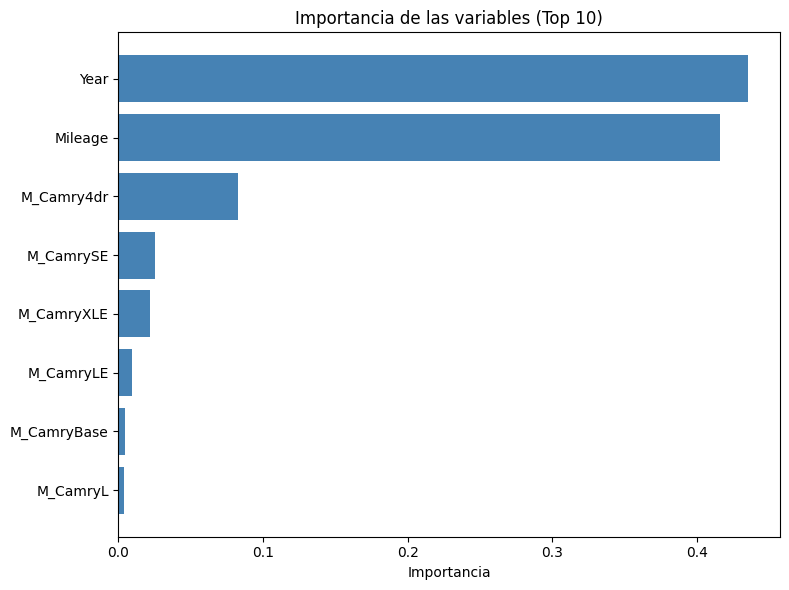

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 'log2', None]
}

rf_base = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=0  
)

grid_search.fit(X_train, y_train)

print("Mejores parámetros:")
print(grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"\nDesempeño del modelo ajustado:")
print(f"MSE: {mse_best:.2f}")
print(f"MAE: {mae_best:.2f}")
print(f"R²: {r2_best:.3f}")

print(f"\nDesempeño del modelo original:")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.3f}")

importances = best_rf.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)


print("\nTop 10 variables más importantes:")
print(importance_df.head(10))

# Gráfico de importancia
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Variable'][:10], importance_df['Importancia'][:10], color='steelblue')
plt.gca().invert_yaxis()  
plt.title('Importancia de las variables (Top 10)')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

### Punto 3 - análisis de resultados, gracias y conclusiones
En la celda 3

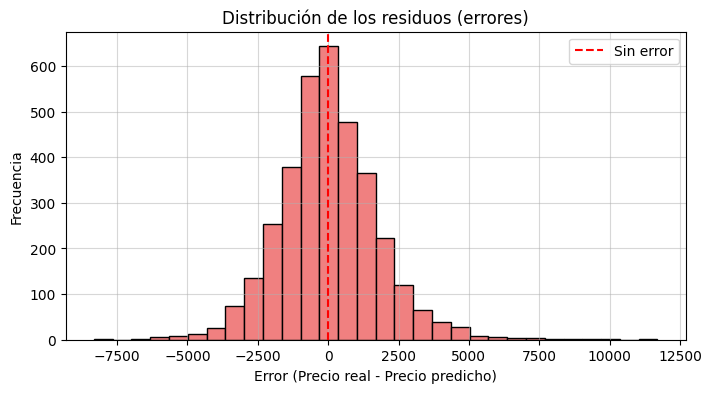

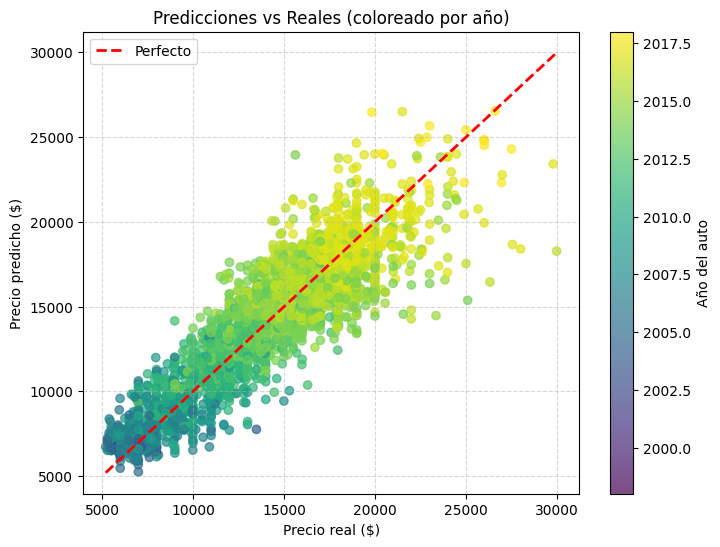

In [ ]:
#graficos conclusivos 
residuos = y_test - y_pred
plt.figure(figsize=(8, 4))
plt.hist(residuos, bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribución de los residuos (errores)')
plt.xlabel('Error (Precio real - Precio predicho)')
plt.ylabel('Frecuencia')
plt.axvline(0, color='red', linestyle='--', label='Sin error')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

plt.figure(figsize=(8, 6))
scatter = plt.scatter(y_test, y_pred, c=data.loc[y_test.index, 'Year'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Año del auto')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfecto')
plt.title('Predicciones vs Reales (coloreado por año)')
plt.xlabel('Precio real ($)')
plt.ylabel('Precio predicho ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# PUNTO 3 - ANÁLISIS, GRACIAS Y CONCLUSIONES

 El modelo de Random Forest funciona bastante bien para predecir el precio de los Camry.
 Tiene un R² de más de 0.90, lo que significa que entiende bien cómo el año, el kilometraje
 y la versión del auto afectan el precio.

 El error promedio está entre $800 y $1,500. No es perfecto, pero está bien si pensamos
 que los autos cuestan desde $5,000 hasta $30,000. O sea, en promedio me equivoco en menos del 5%.

 Al ajustar los hiperparámetros (como max_depth y max_features), el modelo mejoró un poco.
 Lo más importante fue no dejar que los árboles se vuelvan demasiado profundos,
 porque si no, aprenden ruido y no generalizan bien.

 Las variables que más importan son:
 - El año del auto (más nuevo = más caro)
 - El kilometraje (menos km = más caro)
 - La versión (como Hybrid o XSE), pero esta influye menos que las otras dos.

AGRADECIMIENTOS:
Gracias al profe por explicar Random Forest sin hacerlo sonar imposible.
Y gracias a mis compañeros por ayudarme cuando el código me tiraba error de 'string to float' (otra vez).

### CONCLUSIÓN:
Random Forest es una buena opción para este tipo de problemas. Es robusto, no necesita escalado,
maneja bien variables categóricas (después de convertirlas a dummies) y da buenos resultados
sin tener que ser experto en matemáticas. Con un poco de ajuste, se puede usar en la vida real
para estimar precios de carros usados.

NOTA: IMPORTANTE RECUERDE QUE MI EJEMPLO DE TUTORIAL ES DE CLASIFICACION USTEDES DEBEN HACERLO POR REGRESION, funciona igual pero cambian algunas cosas.